In [6]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных

In [ ]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [2]:
data = pd.read_excel('../data/data_ford_price.xlsx') 

#  Отбор признаков: мотивация

## Предобработка данных

In [3]:
data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

y = data['price']
x = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

<AxesSubplot: >

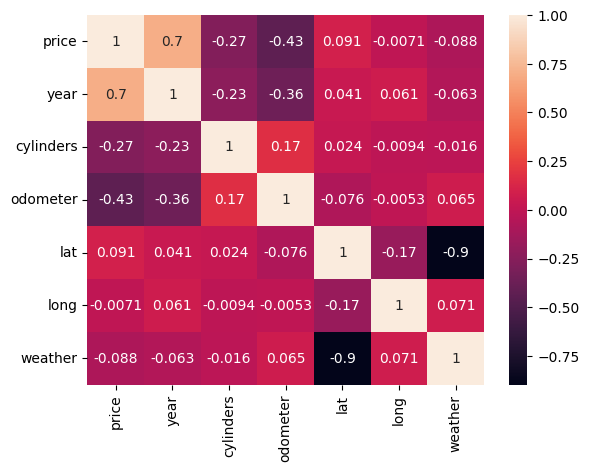

In [8]:
sns.heatmap(data.corr(), annot=True)

## Обучение модели

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4682.957


## Удаление избыточного признака

In [9]:
x.drop('lat', axis = 1, inplace = True)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: %.3f' % mae)

MAE: 4672.930


#  Отбор признаков: классификация методов

## Метод рекурсивного исключения признаков

In [12]:
from sklearn.feature_selection import RFE

In [13]:
y = data['price']
x = data.drop(columns='price')

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [17]:
estimator = LinearRegression() # модель обучения
selector = RFE(estimator, n_features_to_select=3, step=1)
# метод выбора прищнаков , где 
# n_features_to_select - количество итоговых признаков
# step =  количество итераций
selector = selector.fit(X_train, y_train) # обучаем модель
 
selector.get_feature_names_out() # выдает итог выбранных признаков

array(['year', 'cylinders', 'lat'], dtype=object)

In [16]:
X_train.columns

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')

In [18]:
selector.ranking_  # что бы проверить какая значимость у какого признака

array([1, 1, 4, 1, 3, 2])

##  МЕТОДЫ ВЫБОРА ПРИЗНАКОВ НА ОСНОВЕ ФИЛЬТРОВ

In [19]:
from sklearn.feature_selection import SelectKBest, f_regression

In [21]:
selector = SelectKBest(f_regression, k=3) # первым передается статистический метод, и количество нужных признаков
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)